# Import Libraries and Data

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [7]:
df = pd.read_csv('Supply Chain Final Project Data.csv')

In [8]:
df.head()

,Date,Day_of_Week,Shrimp,Steak,Tomato
0,1/1/2023,Sunday,0,0,0
1,1/2/2023,Monday,6,5,253
2,1/3/2023,Tuesday,13,16,239
3,1/4/2023,Wednesday,8,9,204
4,1/5/2023,Thursday,12,8,273


# Reshaping the Data (Wide to Long Format)

In [9]:
# Reshape the data from wide to long format
df_long = df.melt(id_vars=['Date', 'Day_of_Week'], var_name='Ingredient', value_name='Sales_Units')

# Ensure 'Date' is in datetime format 
df_long['Date'] = pd.to_datetime(df_long['Date'], errors='coerce')

# Fill any missing values (if applicable)
df_long['Sales_Units'] = df_long['Sales_Units'].fillna(0)

# Display the reshaped dataframe
df_long.head()

#df_long.to_csv('data_formatted.csv', index=False)

,Date,Day_of_Week,Ingredient,Sales_Units
0,2023-01-01,Sunday,Shrimp,0
1,2023-01-02,Monday,Shrimp,6
2,2023-01-03,Tuesday,Shrimp,13
3,2023-01-04,Wednesday,Shrimp,8
4,2023-01-05,Thursday,Shrimp,12


In [10]:
# Filter out Sundays where all sales are 0
df_long_filtered = df_long[df_long['Day_of_Week'] != 'Sunday']

# Display the reshaped dataframe
df_long_filtered.head()

#df_long.to_csv('data_formatted_no_sunday.csv', index=False)

,Date,Day_of_Week,Ingredient,Sales_Units
1,2023-01-02,Monday,Shrimp,6
2,2023-01-03,Tuesday,Shrimp,13
3,2023-01-04,Wednesday,Shrimp,8
4,2023-01-05,Thursday,Shrimp,12
5,2023-01-06,Friday,Shrimp,24


# Plotting the Data

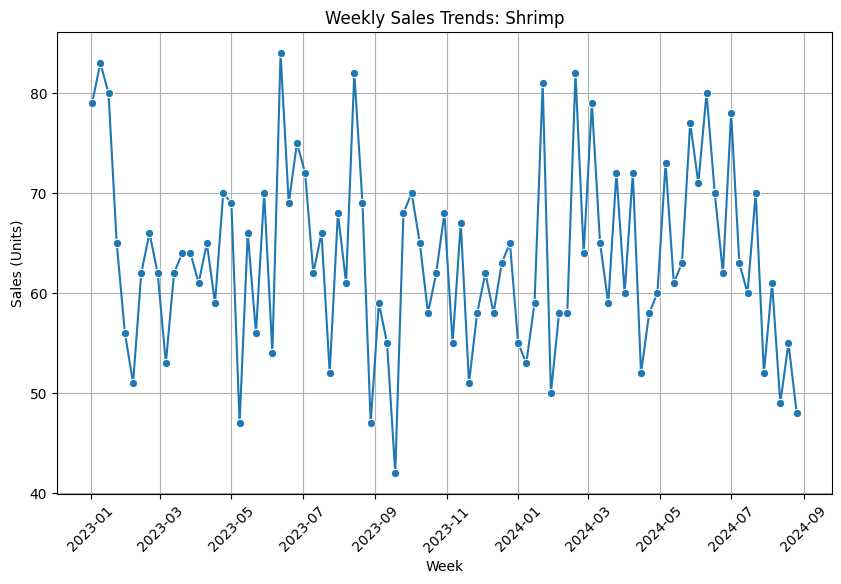

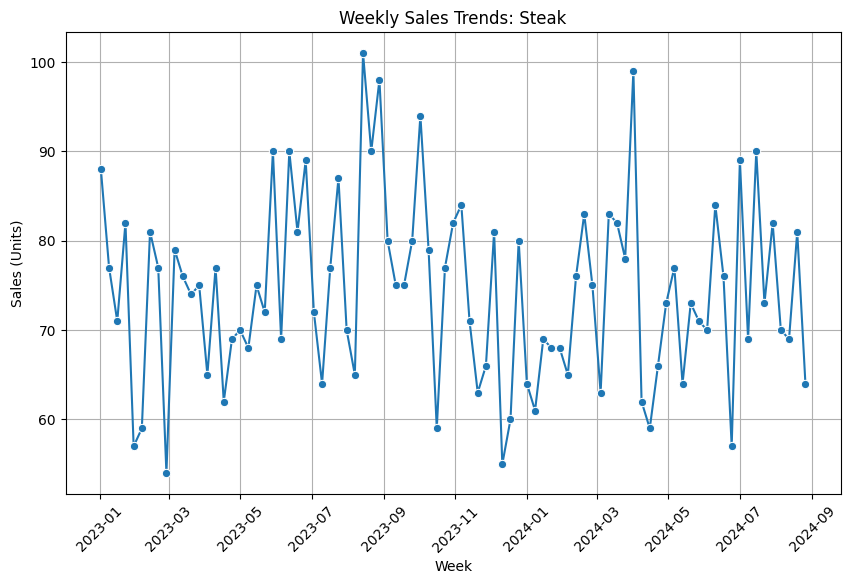

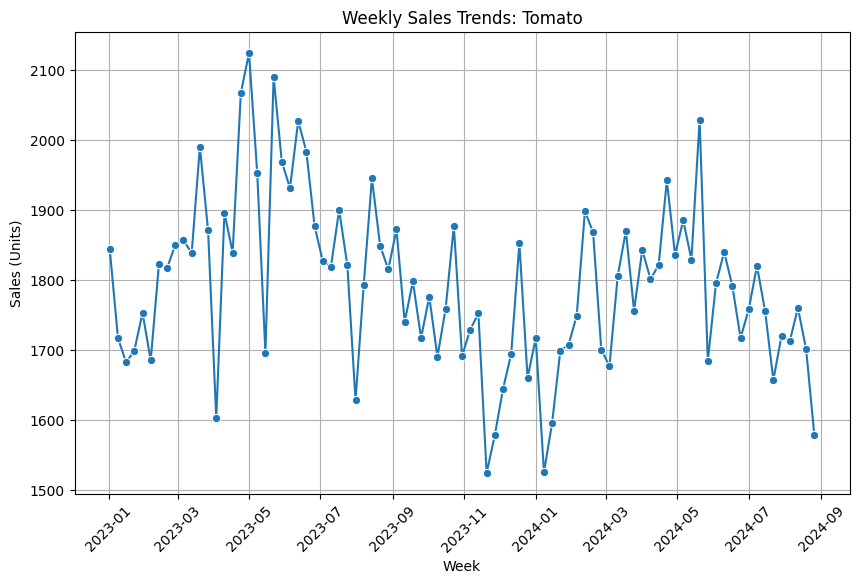

In [11]:
# Make a copy of the filtered dataframe
df_long_filtered = df_long_filtered.copy()

# Aggregate sales by week
df_long_filtered['Week'] = df_long_filtered['Date'].dt.to_period('W').dt.start_time
weekly_data = df_long_filtered.groupby(['Week', 'Ingredient'])['Sales_Units'].sum().reset_index()

# Create one plot per ingredient
ingredients = weekly_data['Ingredient'].unique()

for ingredient in ingredients:
    # Filter data for the current ingredient
    ingredient_data = weekly_data[weekly_data['Ingredient'] == ingredient]
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=ingredient_data, x='Week', y='Sales_Units', marker='o')
    plt.title(f"Weekly Sales Trends: {ingredient}")
    plt.xlabel("Week")
    plt.ylabel("Sales (Units)")
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()